### 2ds probe

In [1]:
import iris
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import seaborn as sns
import xesmf as xe
import pandas as pd
#import def_homebrew as hb ## homemade functions xox
from scipy.special import gamma
import netCDF4 as nc
import datetime

In [2]:
path = '/gws/nopw/j04/dcmex/users/glloyd/'
nc_name = '2DS_MAN_20220730_v001_r0_c307.nc' #2DS_MAN_YYYYMMDD_v001_r0_name
nc_file = nc.Dataset(path+nc_name,'r')
## 2ds has stuff within 

time_dim = nc_file.dimensions['time']
index_dim = nc_file.dimensions['index']

time_var = nc_file.variables['time']
time_array = time_var[:]

# Convert time variable to normal time
time = [datetime.datetime.utcfromtimestamp(t) for t in time_array]

ambient_particle_d = nc_file.variables['ambient_particle_diameter'][:]

## things within groups
ch0_group = nc_file.groups['ch0']
total_particle_conc_0 = ch0_group.variables['ambient_allaccept_particle_number_per_channel']#[:,:]
conc_ambient_particle = ch0_group.variables['total_number_concentration_of_ambient_allaccept_particles_in_air']
#total_along_time = np.sum(ambient_particle_0, axis=0)

HI_0 = ch0_group.variables['total_number_concentration_of_ambient_HI_particles_in_air'][:]
MI_0 = ch0_group.variables['total_number_concentration_of_ambient_MI_particles_in_air'][:]
LI_0 = ch0_group.variables['total_number_concentration_of_ambient_LI_particles_in_air'][:]

"""
time_var = nc_file.variables['time']
time = [datetime.datetime.utcfromtimestamp(t) for t in time_var]
measurement_channel_lower_limit_var = nc_file.variables['measurement_channel_lower_limit']
measurement_channel_upper_limit_var = nc_file.variables['measurement_channel_upper_limit']
corrFac_var = nc_file.variables['corrFac']
flag_var = nc_file.variables['flag']
"""
#total_along_time
print(len(time_dim))

14094


In [9]:
total_particle_conc_0

<class 'netCDF4._netCDF4.Variable'>
float64 ambient_allaccept_particle_number_per_channel(time, index)
    _FillValue: -1e+20
    long_name: Ambient allaccept Particle Number per Channel (dN)
    units: cm-3
    valid_min: 0.0
    valid_max: 1519.4228450181217
    cell_methods: time: mean
    category_configuration: OASIS category table for allaccept: Min Area = 0.0; Max Area = inf; Min Shape = 0.0; Max Shape = inf; Min IAT = 1e-06; Max IAT = inf; Edge Rej = 1.0; Min N = 0.0; Max N = 10.0; Min Area Frac = 0.8; Max Area Frac = 1.0; Min Aspect Ratio = 0.0; Max Aspect Ratio = inf; Width Min = 0.0; Width Max = inf; Streak = 5.0; CoM = 0.0; Gray Mode = 0.0; Zd threshold = 0.0
path = /ch0
unlimited dimensions: 
current shape = (14094, 128)
filling on

In [5]:
total_particle_conc_0.ndim

2

In [10]:
# Assuming you have an opened NetCDF4 Dataset object 'dataset'
#variable = dataset.variables['ambient_allaccept_particle_number_per_channel']

variable = nc_file['ch0']['ambient_allaccept_particle_number_per_channel']

# Create dimension names based on the number of dimensions
#dims = [f'dim_{i}' for i in range(len(data_shape))]


## conversion of time
time_var = nc_file.variables['time']

# Get the values from the time variable
time_values = time_var[:]
epoch_start = datetime.datetime(1970, 1, 1)
datetime_values = [epoch_start + datetime.timedelta(seconds=float(time)) for time in time_values]


# Create a corresponding xarray DataArray
ambient_allaccept_particle_number_xr = xr.DataArray(variable[:,:],  # Extract the data
                                                    dims=['time', 'index'],  # Define dimensions
                                                    #dims = dims,
                                                    #coords={'time': nc_file.variables['time'][:], 'index': nc_file.variables['ambient_particle_diameter'][:]},  # Specify coordinates
                                                    coords={'time': datetime_values, 'index': nc_file.variables['ambient_particle_diameter'][:]},  # Specify coordinates
                                                    
                                                    #coords = coords,
                                                    attrs={key: variable.getncattr(key) for key in variable.ncattrs()})  # Copy attributes


In [18]:
print(ambient_allaccept_particle_number_xr['time'])
#print(nc_file.variables['time'])

<xarray.DataArray 'time' (time: 14094)>
array(['2022-07-30T15:30:07.000000000', '2022-07-30T15:30:08.000000000',
       '2022-07-30T15:30:09.000000000', ..., '2022-07-30T19:24:58.000000000',
       '2022-07-30T19:24:59.000000000', '2022-07-30T19:25:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2022-07-30T15:30:07 ... 2022-07-30T19:25:00


Text(0.5, 1.0, 'total PSD through 30/07/2022 flight')

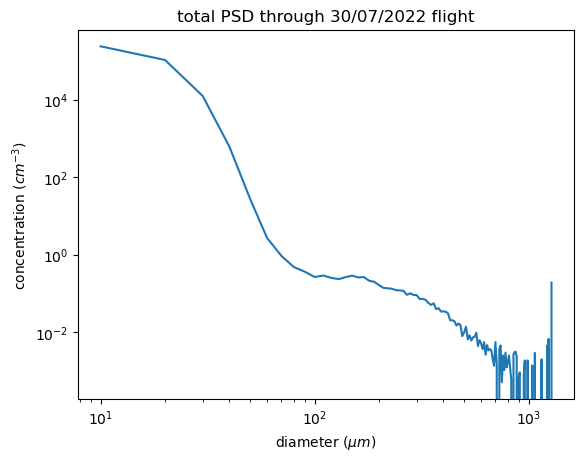

In [51]:
total_particle_conc = ambient_allaccept_particle_number_xr.sum(dim=('time'))
#ambient_allaccept_particle_number_xr.plot()

plt.plot(total_particle_conc)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('diameter ($\mu m$)')
plt.ylabel('concentration ($cm^{-3}$)')
plt.title('total PSD through 30/07/2022 flights')
#.plot()

In [12]:
#total_particle_mean_0 = total_particle_conc_0.mean(dim=['time'])
print(total_particle_conc_0)

<class 'netCDF4._netCDF4.Variable'>
float64 ambient_allaccept_particle_number_per_channel(time, index)
    _FillValue: -1e+20
    long_name: Ambient allaccept Particle Number per Channel (dN)
    units: cm-3
    valid_min: 0.0
    valid_max: 1519.4228450181217
    cell_methods: time: mean
    category_configuration: OASIS category table for allaccept: Min Area = 0.0; Max Area = inf; Min Shape = 0.0; Max Shape = inf; Min IAT = 1e-06; Max IAT = inf; Edge Rej = 1.0; Min N = 0.0; Max N = 10.0; Min Area Frac = 0.8; Max Area Frac = 1.0; Min Aspect Ratio = 0.0; Max Aspect Ratio = inf; Width Min = 0.0; Width Max = inf; Streak = 5.0; CoM = 0.0; Gray Mode = 0.0; Zd threshold = 0.0
path = /ch0
unlimited dimensions: 
current shape = (14094, 128)
filling on


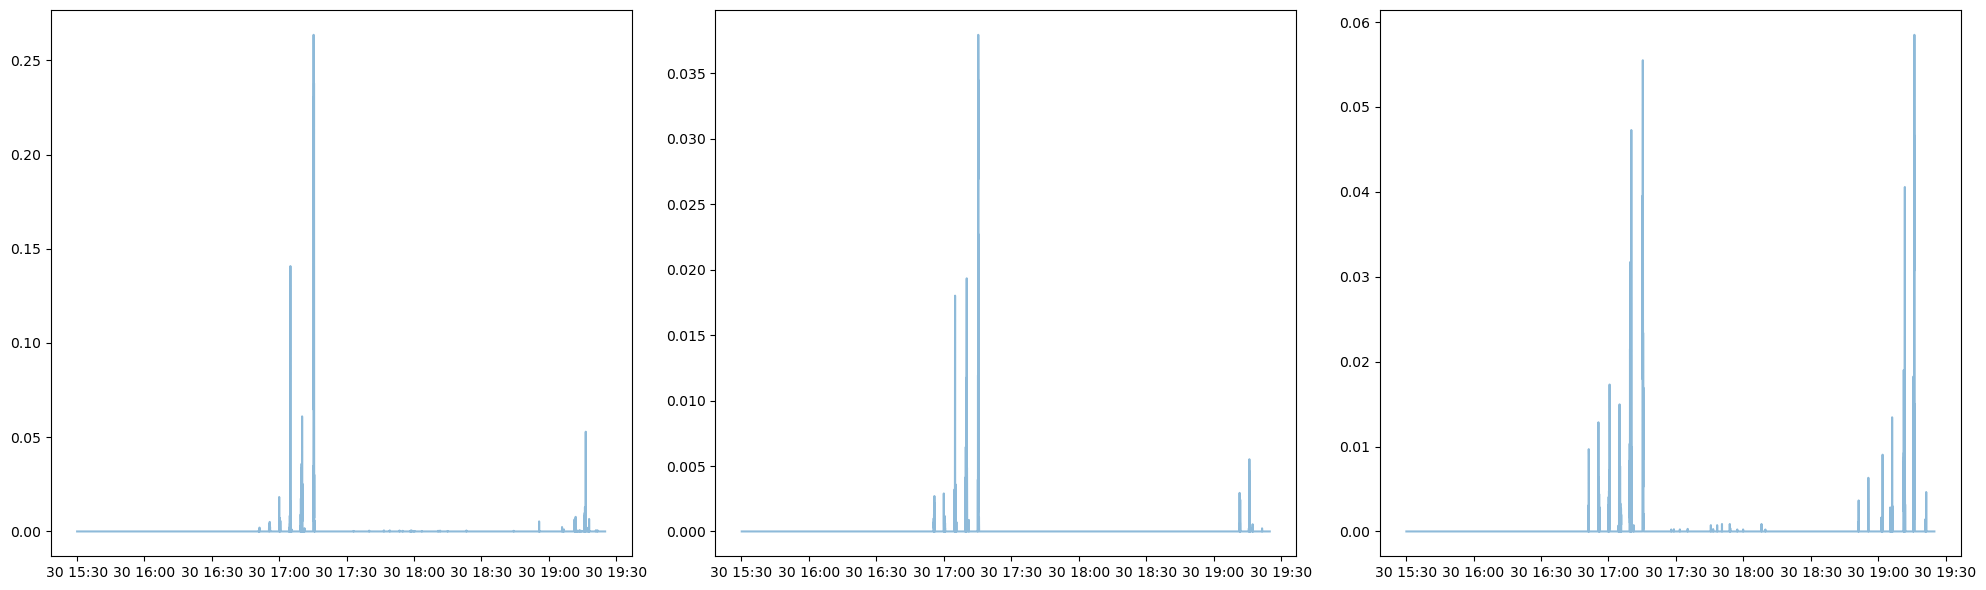

In [4]:
plt.figure(figsize = (20,6))
plt.subplot(131)
plt.plot(time,HI_0, alpha = 0.5, label ='HI ch0')
plt.subplot(132)
plt.plot(time,MI_0, alpha = 0.5, label ='MI ch0')
plt.subplot(133)
plt.plot(time,LI_0, alpha = 0.5, label ='LI ch0')
plt.tight_layout()
#plt.legend()

In [19]:
nc_file.close()